# Atmospheric Temperature Prediction Model
#### Name: MUSTHAHINA P
#### Organization: Entri Elevate
#### Date:



In [82]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,PowerTransformer,StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

In [3]:
# reading data from csv
data = pd.read_csv('beach-weather.csv')

# convert to dataframe
df = pd.DataFrame(data)

In [4]:
# Display the first 5 rows of the DataFrame
df.head()

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
0,Oak Street Weather Station,05/22/2015 03:00:00 PM,NaN,7.0,55.0,0.0,0.0,1.4,0.0,63.0,1.9,2.8,NaN,780.0,322.0,12.0,05/22/2015 3:00 PM,OakStreetWeatherStation201505221500
1,Oak Street Weather Station,05/22/2015 05:00:00 PM,NaN,6.3,56.0,0.0,0.0,1.4,0.0,124.0,1.5,2.3,NaN,180.0,322.0,12.1,05/22/2015 5:00 PM,OakStreetWeatherStation201505221700
2,Oak Street Weather Station,05/22/2015 06:00:00 PM,NaN,6.5,54.0,0.0,0.0,1.4,0.0,156.0,1.9,3.4,NaN,127.0,322.0,12.1,05/22/2015 6:00 PM,OakStreetWeatherStation201505221800
3,Oak Street Weather Station,05/22/2015 07:00:00 PM,NaN,6.3,53.0,0.0,0.0,1.4,0.0,150.0,1.4,4.5,NaN,67.0,322.0,12.1,05/22/2015 7:00 PM,OakStreetWeatherStation201505221900
4,Oak Street Weather Station,05/22/2015 08:00:00 PM,NaN,6.4,52.0,0.0,0.0,1.4,0.0,155.0,1.1,2.3,NaN,10.0,322.0,12.0,05/22/2015 8:00 PM,OakStreetWeatherStation201505222000


In [5]:
# Display the last 5 rows of the DataFrame
df.tail()

,Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
59139,Oak Street Weather Station,11/08/2017 12:00:00 AM,4.70,1.8,60.0,0.0,0.0,0.0,0.0,273.0,0.8,1.5,1005.4,0.0,2.0,11.9,11/08/2017 12:00 AM,OakStreetWeatherStation201711082400
59140,Foster Weather Station,11/08/2017 12:00:00 AM,2.89,NaN,58.0,NaN,0.0,NaN,NaN,278.0,2.1,2.3,1004.4,0.0,NaN,15.2,11/08/2017 12:00 AM,FosterWeatherStation201711082400
59141,63rd Street Weather Station,11/08/2017 01:00:00 AM,3.40,1.1,66.0,0.0,0.0,28.8,0.0,299.0,1.1,2.2,1004.6,4.0,354.0,11.8,11/08/2017 1:00 AM,63rdStreetWeatherStation201711080100
59142,Oak Street Weather Station,11/08/2017 01:00:00 AM,4.20,1.4,59.0,0.0,0.0,0.0,0.0,276.0,0.8,1.7,1005.4,1.0,2.0,12.0,11/08/2017 1:00 AM,OakStreetWeatherStation201711080100
59143,Foster Weather Station,11/08/2017 01:00:00 AM,2.28,NaN,60.0,NaN,0.0,NaN,NaN,273.0,1.6,1.7,1004.1,0.0,NaN,15.2,11/08/2017 1:00 AM,FosterWeatherStation201711080100


In [6]:
# Display a concise summary of the DataFrame, including column data types, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59144 entries, 0 to 59143
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station Name                 59144 non-null  object 
 1   Measurement Timestamp        59141 non-null  object 
 2   Air Temperature              59066 non-null  float64
 3   Wet Bulb Temperature         38843 non-null  float64
 4   Humidity                     59141 non-null  float64
 5   Rain Intensity               38843 non-null  float64
 6   Interval Rain                59141 non-null  float64
 7   Total Rain                   38843 non-null  float64
 8   Precipitation Type           38843 non-null  float64
 9   Wind Direction               59141 non-null  float64
 10  Wind Speed                   59141 non-null  float64
 11  Maximum Wind Speed           59141 non-null  float64
 12  Barometric Pressure          58995 non-null  float64
 13  Solar Radiation 

In [7]:
# Generate descriptive statistics for numerical columns in the DataFrame.
# This includes count, mean, standard deviation, min, max, and quartile values.
df.describe()

,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
count,59066.000000,38843.000000,59141.000000,38843.000000,59141.000000,38843.000000,38843.000000,59141.000000,59141.000000,59141.000000,58995.000000,59141.000000,38843.000000,59141.000000
mean,13.282062,10.643001,69.464517,0.187591,0.175327,185.445529,4.651932,178.980132,2.969908,4.484584,993.718263,108.490421,186.236877,13.055144
std,9.945331,8.965170,15.714691,1.962149,1.300946,231.579782,16.168542,108.124898,6.138399,6.451704,7.044515,211.497272,176.452547,1.485712
min,-19.890000,-20.100000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,964.400000,-6.000000,0.000000,11.600000
25%,5.500000,4.000000,59.000000,0.000000,0.000000,14.900000,0.000000,86.000000,1.400000,2.400000,989.500000,0.000000,1.000000,11.900000
50%,14.900000,12.100000,71.000000,0.000000,0.000000,69.800000,0.000000,196.000000,2.500000,3.800000,993.900000,3.000000,353.000000,12.100000
75%,21.500000,18.100000,82.000000,0.000000,0.000000,279.500000,0.000000,271.000000,4.000000,5.900000,998.100000,96.000000,354.000000,15.100000
max,34.100000,28.400000,100.000000,183.600000,63.420000,1056.100000,70.000000,359.000000,999.900000,999.900000,1019.500000,1277.000000,359.000000,15.300000


In [8]:
# Get the number of rows and columns in the DataFrame.
df.shape

(59144, 18)

In [9]:
# Display the list of column names in the DataFrame
df.columns

Index(['Station Name', 'Measurement Timestamp', 'Air Temperature',
       'Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Interval Rain',
       'Total Rain', 'Precipitation Type', 'Wind Direction', 'Wind Speed',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading', 'Battery Life', 'Measurement Timestamp Label',
       'Measurement ID'],
      dtype='object')

In [10]:
# Display the data types of each column in the DataFrame
df.dtypes

Station Name                    object
Measurement Timestamp           object
Air Temperature                float64
Wet Bulb Temperature           float64
Humidity                       float64
Rain Intensity                 float64
Interval Rain                  float64
Total Rain                     float64
Precipitation Type             float64
Wind Direction                 float64
Wind Speed                     float64
Maximum Wind Speed             float64
Barometric Pressure            float64
Solar Radiation                float64
Heading                        float64
Battery Life                   float64
Measurement Timestamp Label     object
Measurement ID                  object
dtype: object

In [11]:
# Check for missing values in each column and display the count
df.isnull().sum()

Station Name                       0
Measurement Timestamp              3
Air Temperature                   78
Wet Bulb Temperature           20301
Humidity                           3
Rain Intensity                 20301
Interval Rain                      3
Total Rain                     20301
Precipitation Type             20301
Wind Direction                     3
Wind Speed                         3
Maximum Wind Speed                 3
Barometric Pressure              149
Solar Radiation                    3
Heading                        20301
Battery Life                       3
Measurement Timestamp Label        3
Measurement ID                     0
dtype: int64

In [12]:
# Handling missing values 
# Fill missing values in categorical columns with a placeholder
df['Measurement Timestamp'] = df['Measurement Timestamp'].fillna("Unknown")
df['Measurement Timestamp Label'] = df['Measurement Timestamp Label'].fillna("Unknown")

# Fill missing values in categorical column 'Precipitation Type' with the most frequent value (mode)
df['Precipitation Type'] = df['Precipitation Type'].fillna(df['Precipitation Type'].mode()[0])

# Fill missing values in numerical columns with the mean value of the respective column
df['Air Temperature'] = df['Air Temperature'].fillna(df['Air Temperature'].mean())
df['Wet Bulb Temperature'] = df['Wet Bulb Temperature'].fillna(df['Wet Bulb Temperature'].mean())
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mean())
df['Rain Intensity'] = df['Rain Intensity'].fillna(df['Rain Intensity'].mean())
df['Interval Rain'] = df['Interval Rain'].fillna(df['Interval Rain'].mean())
df['Total Rain'] = df['Total Rain'].fillna(df['Total Rain'].mean())
df['Wind Direction'] = df['Wind Direction'].fillna(df['Wind Direction'].mean())
df['Wind Speed'] = df['Wind Speed'].fillna(df['Wind Speed'].mean())
df['Maximum Wind Speed'] = df['Maximum Wind Speed'].fillna(df['Maximum Wind Speed'].mean())
df['Barometric Pressure'] = df['Barometric Pressure'].fillna(df['Barometric Pressure'].mean())
df['Solar Radiation'] = df['Solar Radiation'].fillna(df['Solar Radiation'].mean())
df['Heading'] = df['Heading'].fillna(df['Heading'].mean())
df['Battery Life'] = df['Battery Life'].fillna(df['Battery Life'].mean())


In [13]:
# Check if all null values have been removed from the dataset
df.isnull().sum()

Station Name                   0
Measurement Timestamp          0
Air Temperature                0
Wet Bulb Temperature           0
Humidity                       0
Rain Intensity                 0
Interval Rain                  0
Total Rain                     0
Precipitation Type             0
Wind Direction                 0
Wind Speed                     0
Maximum Wind Speed             0
Barometric Pressure            0
Solar Radiation                0
Heading                        0
Battery Life                   0
Measurement Timestamp Label    0
Measurement ID                 0
dtype: int64

In [14]:
# Check the number of duplicate rows in the dataset
df.duplicated().sum()

0

In [15]:
# Select and display all numerical features from the dataset
numerical_features = df.select_dtypes(include = 'number')
print(numerical_features)

       Air Temperature  Wet Bulb Temperature  Humidity  Rain Intensity  \
0            13.282062              7.000000      55.0        0.000000   
1            13.282062              6.300000      56.0        0.000000   
2            13.282062              6.500000      54.0        0.000000   
3            13.282062              6.300000      53.0        0.000000   
4            13.282062              6.400000      52.0        0.000000   
...                ...                   ...       ...             ...   
59139         4.700000              1.800000      60.0        0.000000   
59140         2.890000             10.643001      58.0        0.187591   
59141         3.400000              1.100000      66.0        0.000000   
59142         4.200000              1.400000      59.0        0.000000   
59143         2.280000             10.643001      60.0        0.187591   

       Interval Rain  Total Rain  Precipitation Type  Wind Direction  \
0                0.0    1.400000       

Text(0, 0.5, 'Values')

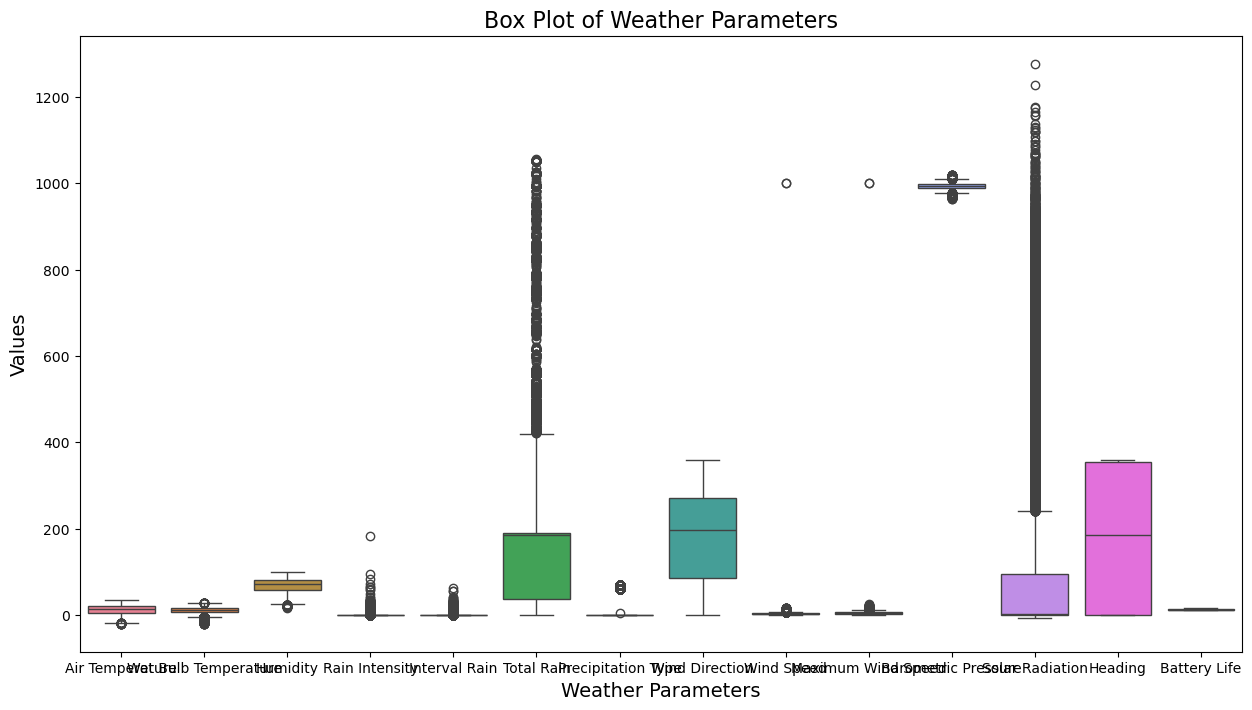

In [16]:
# Create a boxplot for numerical weather parameters to visualize outliers
plt.figure(figsize = (15,8))
sns.boxplot(df[numerical_features.columns])
plt.title("Box Plot of Weather Parameters", fontsize=16)
plt.xlabel("Weather Parameters", fontsize=14)
plt.ylabel("Values", fontsize=14)

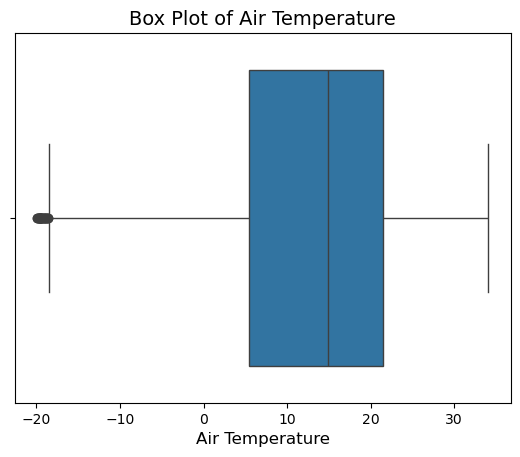

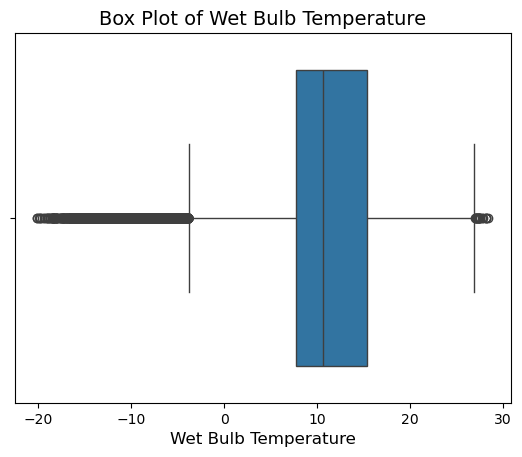

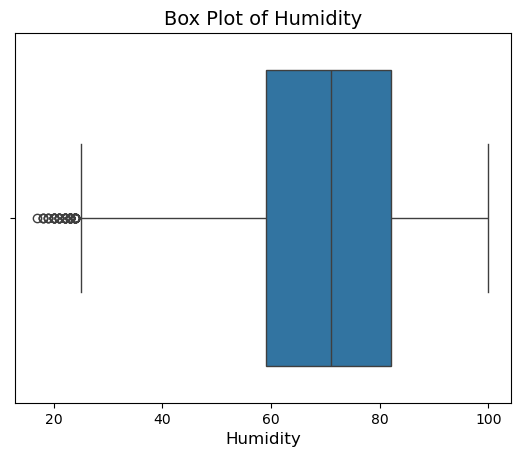

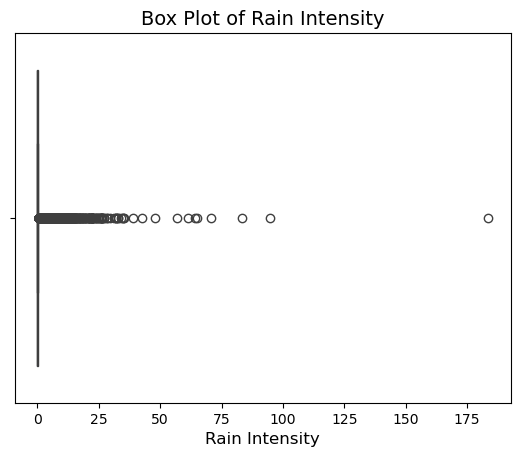

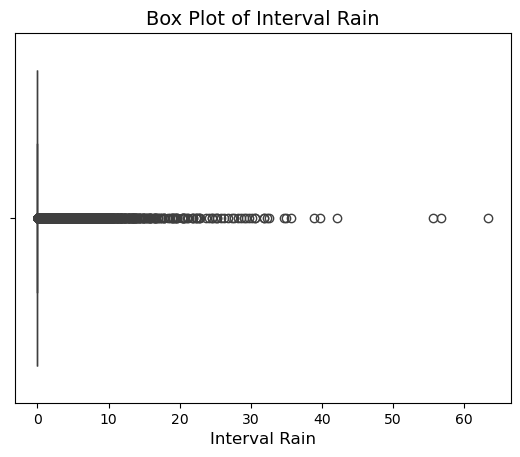

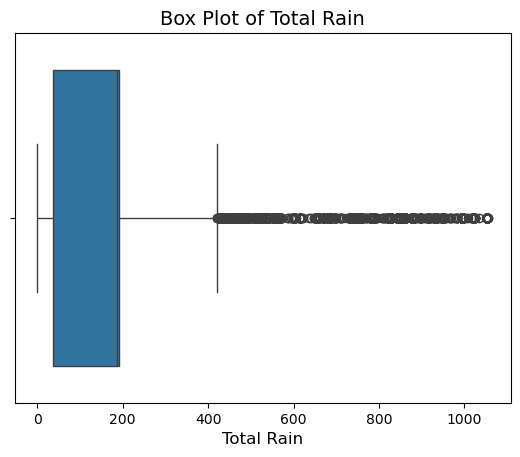

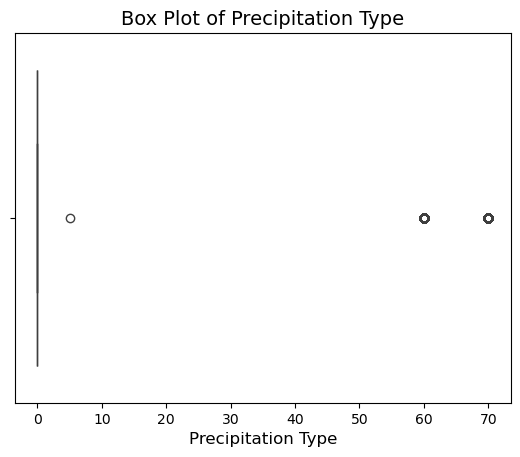

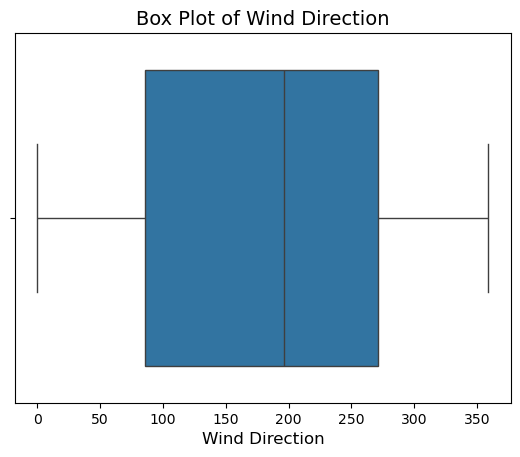

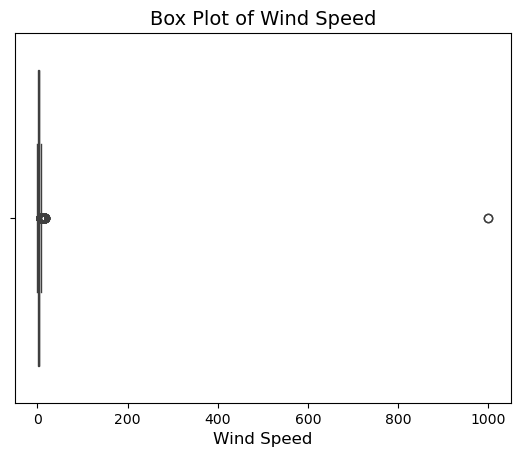

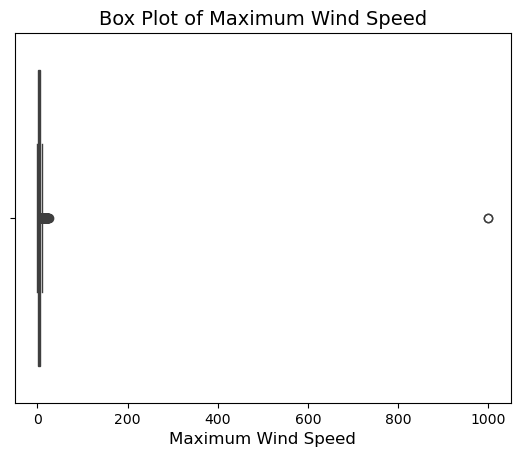

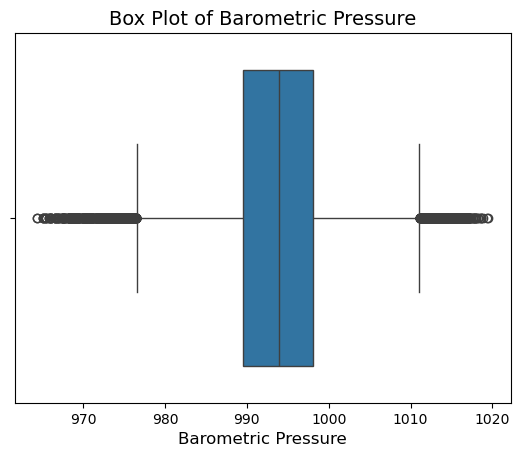

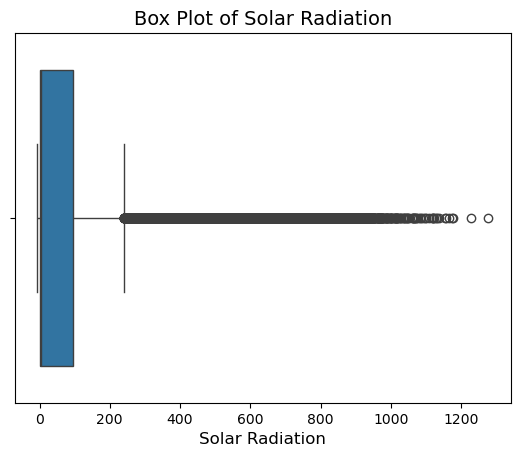

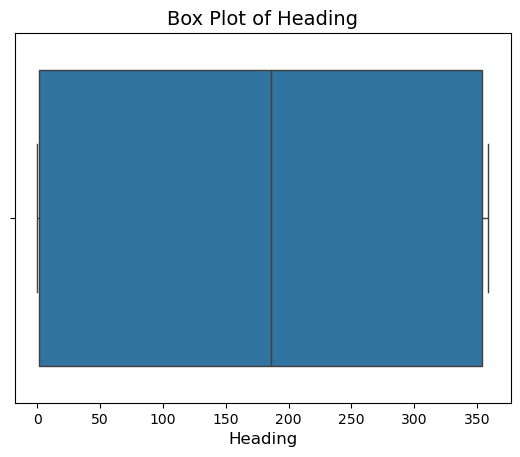

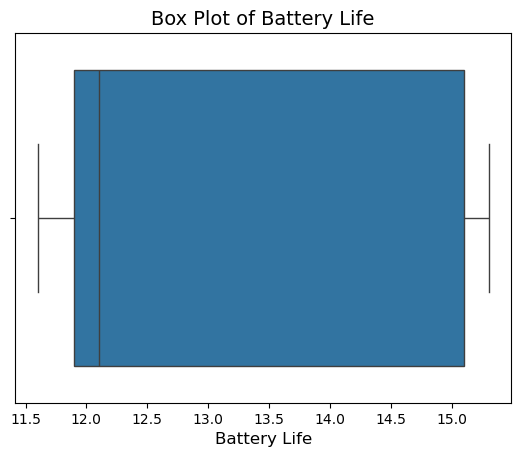

In [17]:
# Loop through each numerical feature and plot its boxplot
for i in numerical_features.columns:
    sns.boxplot(data =df,x = i)
    # Add title and labels
    plt.title(f"Box Plot of {i}", fontsize=14)
    plt.xlabel(i, fontsize=12)
    plt.show()
    

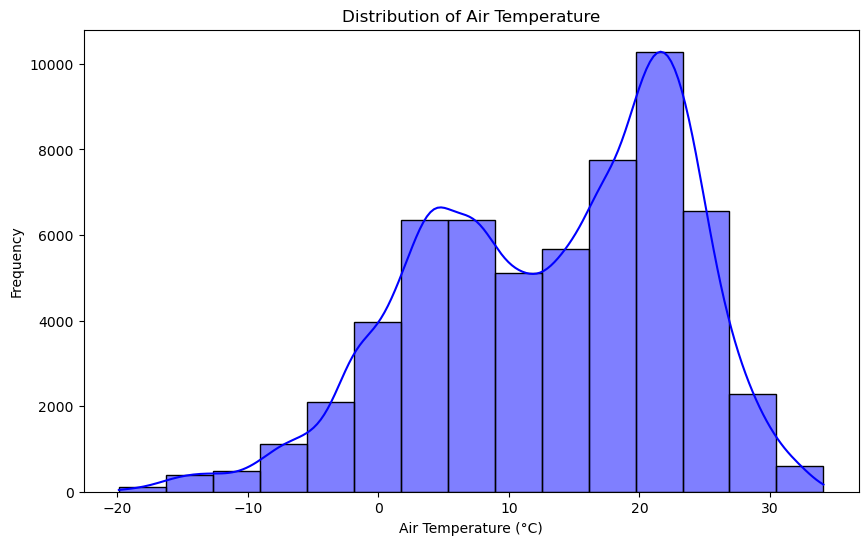

In [18]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Air Temperature'],bins=15,kde=True, color="blue")

# Labels and Title
plt.xlabel("Air Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Air Temperature")

plt.show()

### Insights from the Histogram of Air Temperature
* The air temperature varies approximately from -20°C to 35°C.
* Negative temperatures indicate the presence of colder climates in the dataset.
* The highest frequency of air temperature values is between 15°C and 25°C.
* The data is slightly left-skewed, meaning there are more extreme cold temperature values than extreme hot values.
* The tail towards the negative side indicates outliers in colder temperatures.

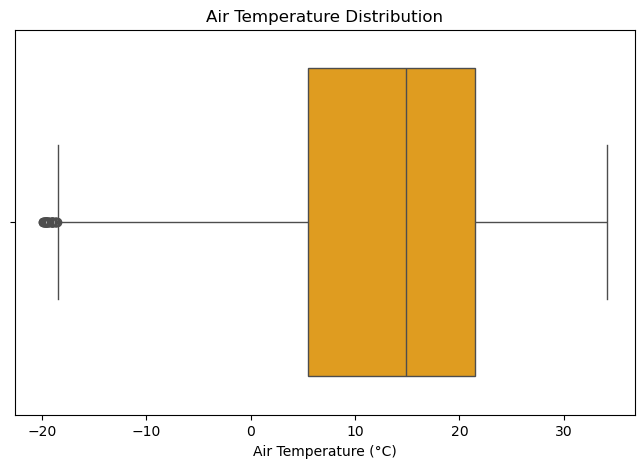

In [20]:
#box plot for target variable Air Temperature
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Air Temperature'], color="orange")
plt.xlabel("Air Temperature (°C)")
plt.title("Air Temperature Distribution")
plt.show()


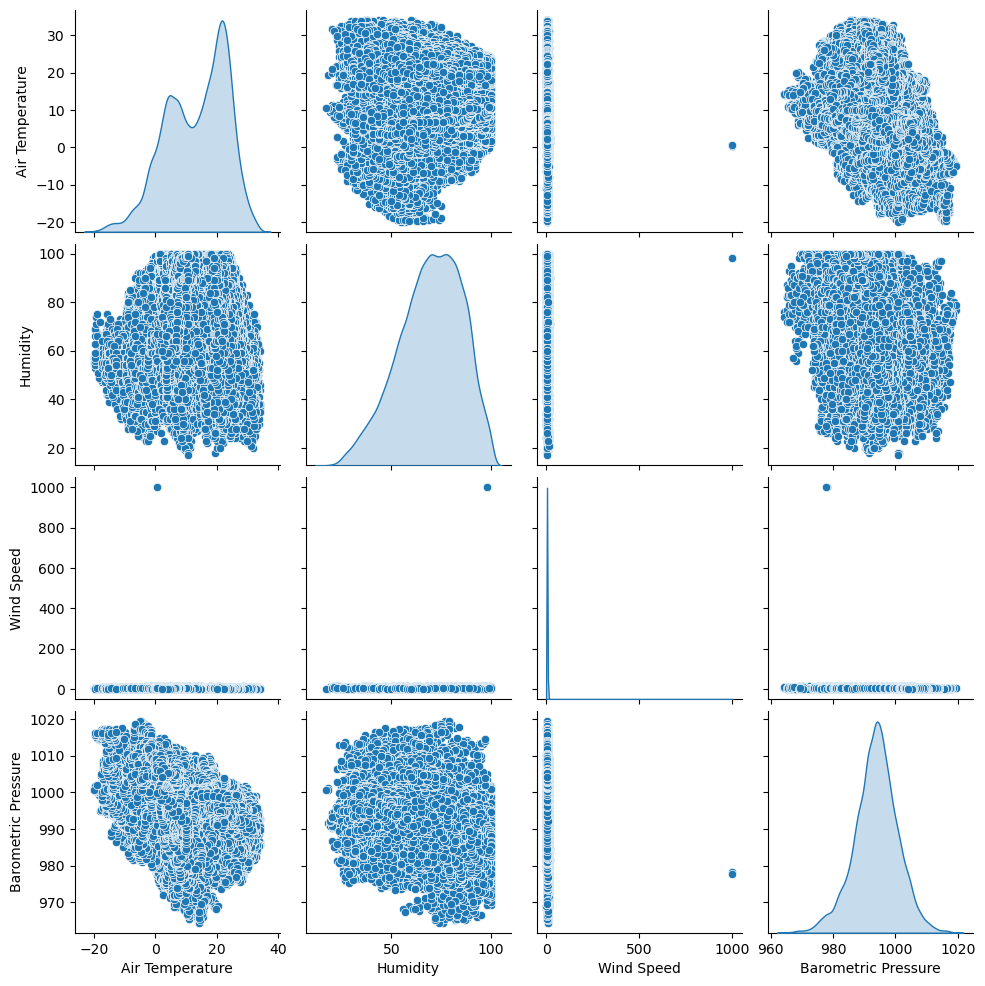

In [21]:
# Creating a pairplot to visualize pairwise relationships between selected numerical features
sns.pairplot(df[['Air Temperature', 'Humidity', 'Wind Speed', 'Barometric Pressure']], diag_kind='kde')
plt.show()

### Insights from the Pairplot:
* 1.Air Temperature Distribution:
The KDE plot shows a bimodal distribution, indicating two distinct peaks in temperature values.
The scatter plots with other variables do not show strong linear relationships.
* 2.Humidity vs. Other Features:
Humidity appears to have a roughly normal distribution.
There are no strong correlations with Air Temperature or Barometric Pressure based on the scatter plots.
* 3.Wind Speed Issues:
The Wind Speed data appears to have many points clustered at a single value (possibly zero or a constant value).
The KDE for Wind Speed is almost empty, indicating data issues or missing values.
Outliers are visible with extremely high wind speed values (above 200).
* 4.Barometric Pressure:
The KDE plot suggests a normal distribution with a peak around 1000 hPa.
The scatter plots with Air Temperature and Humidity show a dense spread, indicating no clear trend.

In [23]:
#Define a function to remove outliers
def outliers(df):
    for i in numerical_features.columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
        df[i] = df[i].apply(lambda x : lower if x < lower else upper if x > upper else x)
    return df



In [24]:
# store the outliers removed dataset to new dataframe
df1 = outliers(df)

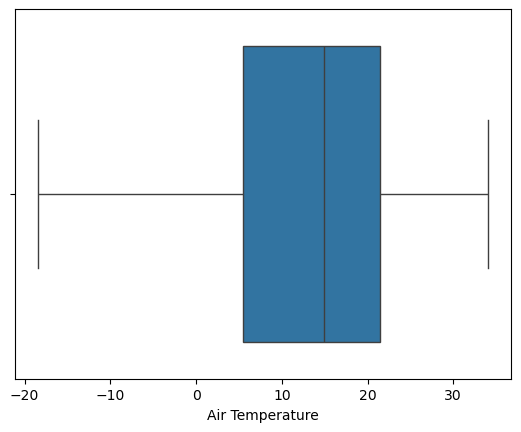

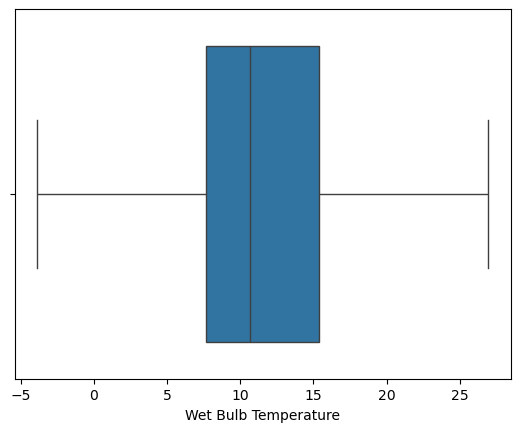

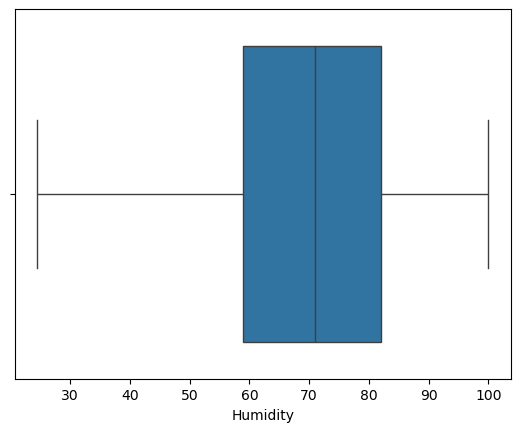

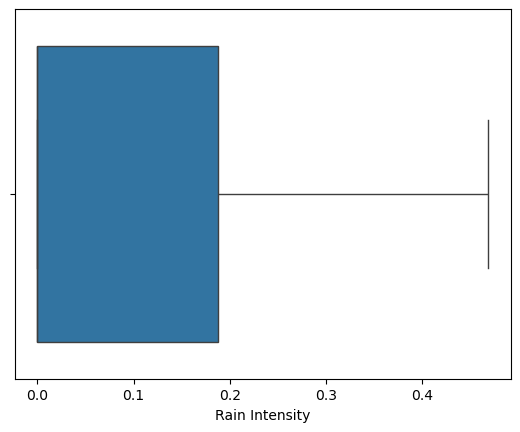

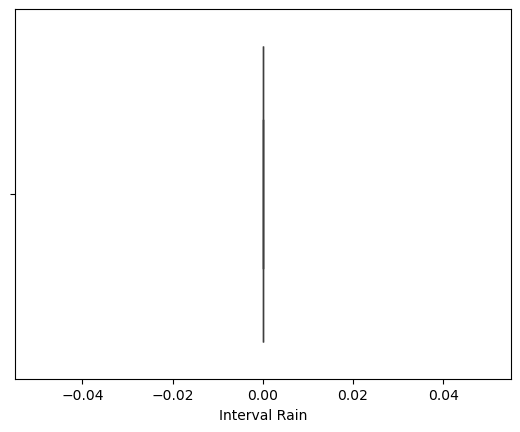

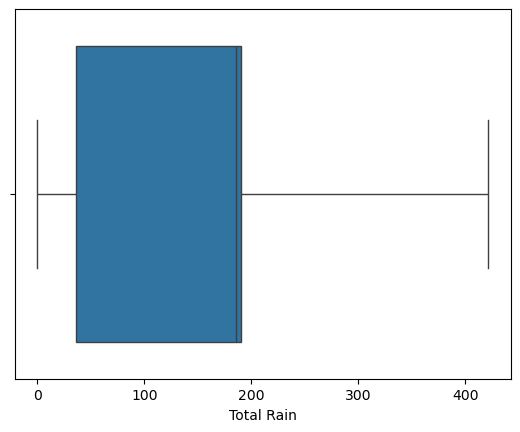

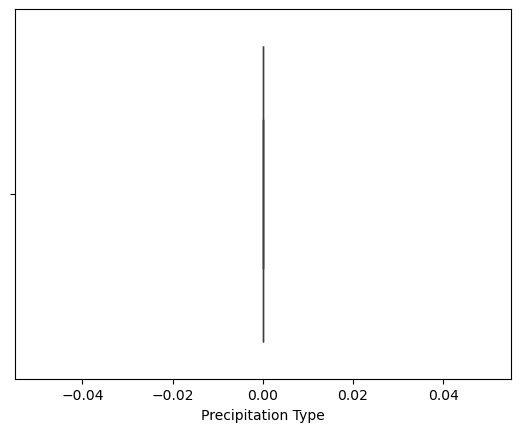

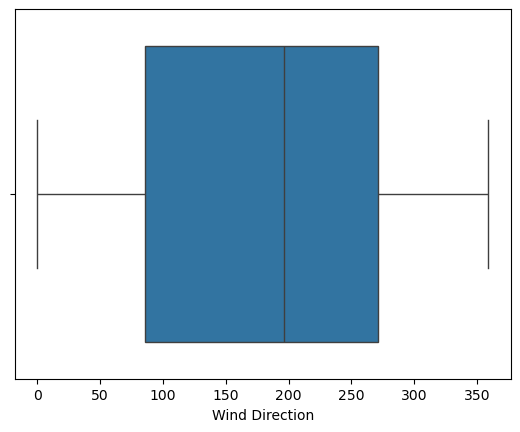

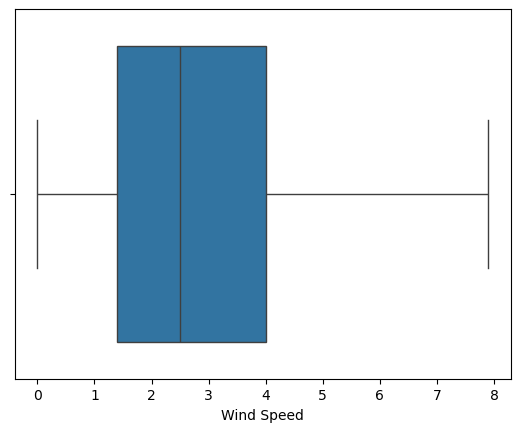

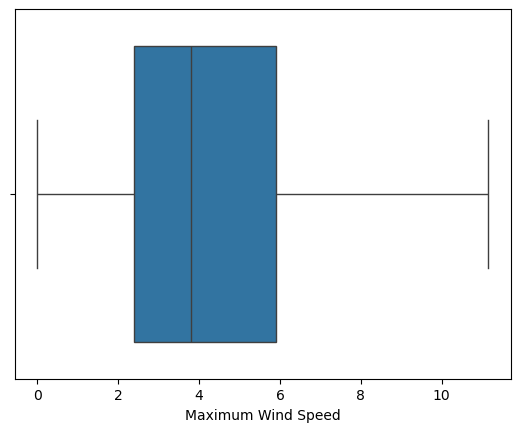

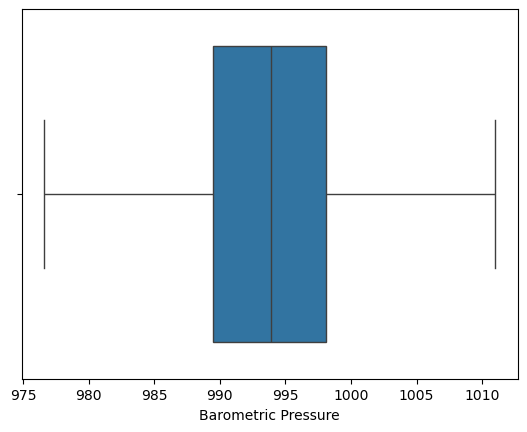

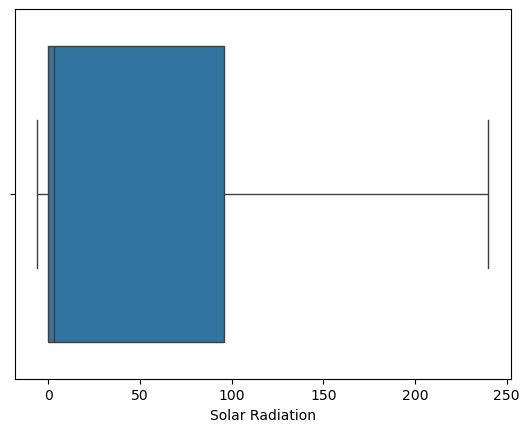

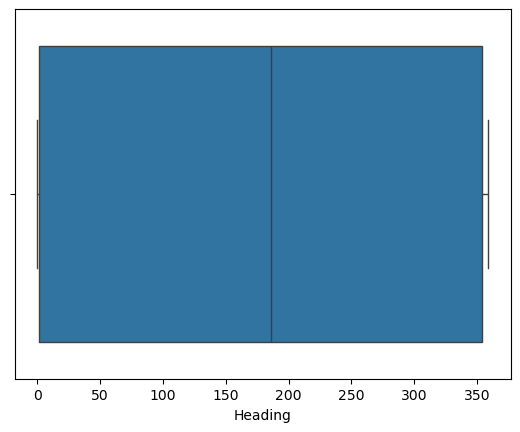

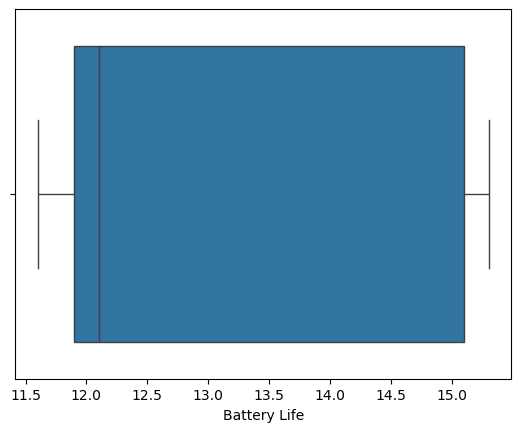

In [25]:
#Plot boxplot after removing outliers
for i in numerical_features.columns:
    sns.boxplot(data = df1,x= i)
    plt.show()

In [26]:
# Selecting only numerical features from the dataset
df2 = df1[numerical_features.columns]
df2

,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life
0,13.282062,7.000000,55.0,0.000000,0.0,1.400000,0.0,63.0,1.9,2.8,993.718263,240.0,322.000000,12.0
1,13.282062,6.300000,56.0,0.000000,0.0,1.400000,0.0,124.0,1.5,2.3,993.718263,180.0,322.000000,12.1
2,13.282062,6.500000,54.0,0.000000,0.0,1.400000,0.0,156.0,1.9,3.4,993.718263,127.0,322.000000,12.1
3,13.282062,6.300000,53.0,0.000000,0.0,1.400000,0.0,150.0,1.4,4.5,993.718263,67.0,322.000000,12.1
4,13.282062,6.400000,52.0,0.000000,0.0,1.400000,0.0,155.0,1.1,2.3,993.718263,10.0,322.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59139,4.700000,1.800000,60.0,0.000000,0.0,0.000000,0.0,273.0,0.8,1.5,1005.400000,0.0,2.000000,11.9
59140,2.890000,10.643001,58.0,0.187591,0.0,185.445529,0.0,278.0,2.1,2.3,1004.400000,0.0,186.236877,15.2
59141,3.400000,1.100000,66.0,0.000000,0.0,28.800000,0.0,299.0,1.1,2.2,1004.600000,4.0,354.000000,11.8
59142,4.200000,1.400000,59.0,0.000000,0.0,0.000000,0.0,276.0,0.8,1.7,1005.400000,1.0,2.000000,12.0


In [27]:
# Separating the independent variables (features) from the dependent variable (target) for feature selection
x = df2.drop(columns = ['Air Temperature'])
y = df2['Air Temperature']

In [28]:
#feature selection
sk = SelectKBest(score_func = f_regression,k=10)
x_new = sk.fit_transform(x,y)
x_selected = x.columns[sk.get_support()]
print("Selected Features")
print(x_selected)
feature_score = pd.DataFrame({'Feature':x.columns,'Score': sk.scores_}).sort_values(by = 'Score',ascending = False)
print(feature_score)

Selected Features
Index(['Wet Bulb Temperature', 'Humidity', 'Rain Intensity', 'Total Rain',
       'Wind Direction', 'Wind Speed', 'Maximum Wind Speed',
       'Barometric Pressure', 'Solar Radiation', 'Heading'],
      dtype='object')
                 Feature         Score
0   Wet Bulb Temperature  94642.457974
4             Total Rain  12316.189156
7             Wind Speed   4450.768404
8     Maximum Wind Speed   2872.572915
9    Barometric Pressure   2698.547364
10       Solar Radiation   1961.581649
6         Wind Direction   1152.595279
2         Rain Intensity    174.218518
11               Heading     83.013331
1               Humidity     77.577763
12          Battery Life     76.560723
3          Interval Rain      0.000000
5     Precipitation Type      0.000000


In [29]:
# Calculating skewness for each numerical feature
df2.skew()

Air Temperature        -0.437316
Wet Bulb Temperature   -0.260880
Humidity               -0.390572
Rain Intensity          1.345121
Interval Rain           0.000000
Total Rain              0.547329
Precipitation Type      0.000000
Wind Direction         -0.123381
Wind Speed              0.886285
Maximum Wind Speed      0.836572
Barometric Pressure    -0.135861
Solar Radiation         1.216410
Heading                -0.122219
Battery Life            0.655641
dtype: float64

In [30]:
# Applying Yeo-Johnson Power Transformation
pt = PowerTransformer(method = 'yeo-johnson')
x_transformed = pt.fit_transform(df2)

# Converting transformed data back into a DataFrame
df3 = pd.DataFrame(x_transformed, columns = df2.columns )

In [31]:
# Check the skewness of the transformed data
df3.skew()

Air Temperature        -0.285681
Wet Bulb Temperature   -0.151642
Humidity               -0.094361
Rain Intensity          0.562791
Interval Rain           0.000000
Total Rain             -0.295195
Precipitation Type      0.000000
Wind Direction         -0.413941
Wind Speed             -0.006474
Maximum Wind Speed     -0.012828
Barometric Pressure     0.000792
Solar Radiation        -0.341969
Heading                -0.611162
Battery Life            0.609087
dtype: float64

In [32]:
df3.nunique()

Air Temperature          953
Wet Bulb Temperature     309
Humidity                  78
Rain Intensity             3
Interval Rain              1
Total Rain              1494
Precipitation Type         1
Wind Direction           361
Wind Speed                81
Maximum Wind Speed       113
Barometric Pressure      347
Solar Radiation          247
Heading                   17
Battery Life              15
dtype: int64

In [33]:
# Extract the target variable 'Air Temperature' from the transformed dataset
y = df3['Air Temperature']

# Select only the features specified in 'x_selected' from the transformed dataset
df4 = df3[x_selected]

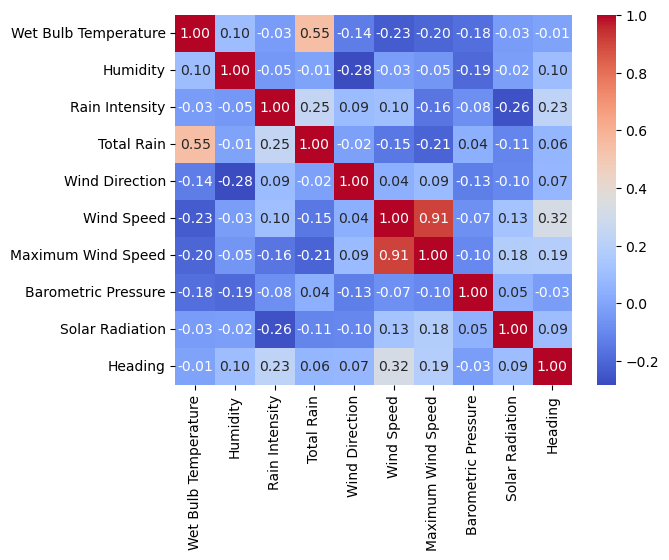

In [34]:
# Compute the correlation matrix for the selected features
correlation = df4.corr()

# Create a heatmap to visualize the correlation between numerical features
sns.heatmap(correlation,annot = True,cmap = 'coolwarm',fmt = '0.2f')
plt.show()

In [35]:
#Scaling
# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the selected features
x_scaled = scaler.fit_transform(df4)


In [36]:
# Splitting the dataset into training (80%) and testing (20%) sets
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 42)

In [72]:
# Display the shape of training and testing sets
print(f"""
X train shape : {x_train.shape}
X test shape : {x_test.shape} 
Y train shape : {y_train.shape}
y test shape : {y_test.shape}
""")


X train shape : (47315, 10)
X test shape : (11829, 10) 
Y train shape : (47315,)
y test shape : (11829,)



### Model Development and Performance Evaluation

In [140]:
# Define a dictionary containing different regression models
models = {
    '1.LinearRegression' : LinearRegression(),
    '2.DecisionTreeRegressor': DecisionTreeRegressor(),
    '3.SVR': SVR(),
    '4.RandomForestRegressor': RandomForestRegressor(),
    '5.GradientBoostingRegressor': GradientBoostingRegressor(),
    '6.MLPRegressor': MLPRegressor(),
    '7.AdaBoostRegressor' : AdaBoostRegressor()
}

In [142]:
# Dictionary to store evaluation results for each model
results ={}

# Loop through each model in the models dictionary
for model_name,model in models.items():
    # Train the model using the training data
    model.fit(x_train,y_train)
    # Make predictions on the test data
    y_pred = model.predict(x_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    # Store results in the dictionary
    results[model_name] = {'MAE': mae,'MSE': mse,'RMSE': rmse,'R2':r2}

#### Comparison of Models:
* All regression models (Linear Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, Support Vector Regressor,MLPRegressor,AdaBoostRegressor) are evaluated using the above metrics. The results for each model are compared to identify:

#### 1.Best-Performing Model:
* The model with the lowest MSE, MAE, and RMSE, and the highest R² score, indicating high accuracy and robustness in predictions.

#### 2.Worst-Performing Model:
* The model with the highest MSE, MAE, and RMSE, and the lowest R² score, suggesting poor performance and a weak ability to capture the variance in the dataset.

In [144]:
# Convert the results dictionary into a Pandas DataFrame
results_df = pd.DataFrame(results).T  # Transpose (T) to make models as rows and metrics as columns

# Display the evaluation results for all models
print(results_df)

                                  MAE       MSE      RMSE        R2
1.LinearRegression           0.376977  0.323654  0.568906  0.673779
2.DecisionTreeRegressor      0.285564  0.400630  0.632953  0.596192
3.SVR                        0.249107  0.224001  0.473287  0.774222
4.RandomForestRegressor      0.211708  0.195227  0.441845  0.803224
5.GradientBoostingRegressor  0.278606  0.230141  0.479730  0.768033
6.MLPRegressor               0.257675  0.208614  0.456743  0.789731
7.AdaBoostRegressor          0.458964  0.364780  0.603970  0.632327


In [146]:
# Sort models by R² score in descending order and Extract the best-performing model (first row after sorting)
best_model = results_df.sort_values(by= 'R2',ascending = False).iloc[0]

# Display the best model name and its evaluation metrics
print("Best model is")
print(best_model)

Best model is
MAE     0.211708
MSE     0.195227
RMSE    0.441845
R2      0.803224
Name: 4.RandomForestRegressor, dtype: float64


In [183]:
# Sort models by R² score in Ascending order and Extract the worst-performing model (first row after sorting)
worst_model = results_df.sort_values(by= 'R2',ascending = True).iloc[0]

# Display the best model name and its evaluation metrics
print("Worst model is")
print(worst_model)

Worst model is
MAE     0.285564
MSE     0.400630
RMSE    0.632953
R2      0.596192
Name: 2.DecisionTreeRegressor, dtype: float64


#### Hyperparameter Tuning

In [148]:
# Define a hyperparameter grid for tuning RandomForestRegressor
param_grid = {
    'n_estimators': [100,200],  
    'max_depth': [10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['sqrt']
}

In [150]:
# Initialize the RandomForestRegressor model with a fixed random state for reproducibility
rf = RandomForestRegressor(random_state=42)

In [152]:
# Perform GridSearchCV to tune hyperparameters of the RandomForestRegressor
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=2)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=2,
             param_grid={'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [153]:
# Print the best hyperparameters found during GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Print the best R² score achieved with the best parameters
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.8007736988448204


In [154]:
# Get the best model with optimized hyperparameters
best_rf = grid_search.best_estimator_

# Display the best model (with optimized hyperparameters)
best_rf

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      random_state=42)

In [168]:
# Initialize a new RandomForestRegressor model with the optimized hyperparameters ,These hyperparameters were previously identified during the GridSearchCV process
best_rf = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,random_state=42)

In [170]:
# Train the RandomForestRegressor model (best_rf) on the training data
best_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      random_state=42)

In [172]:
# Predict on test data
y_pred = best_rf.predict(x_test)

In [174]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [176]:
# Print new model performance
print(f"\n After Hyperparameter Tuning:")
print(f"MSE: {mse:.5f}")
print(f"MAE: {mae:.5f}")
print(f"RMSE: {rmse:.5f}")
print(f"R² Score: {r2:.5f}")


 After Hyperparameter Tuning:
MSE: 0.19234
MAE: 0.22428
RMSE: 0.43857
R² Score: 0.80613
